# 6、在逻辑回归中添加多项式特征


## 本节要点
+ 本节开始处理线性不可分的情况了，那么之前描述的线性逻辑回归就不能很好运作了，不过我们在学习线性回归的时候，引入了多项式特征，把非线性回归的问题转化成了线性回归，在逻辑回归中，我们同样可以这么做
+ 引入了多项式特征以后，一定不要忘记的两件事情就是：（1）特征标准化（2）处理过拟合问题
+ 面对过拟合的问题，一个行之有效的办法，我们在线性回归中也遇到过，那就是正则化。

普通的逻辑回归解决的二分类问题是当数据线性可分的情况。
如果决策边界不是直线的时候，我们就可以把逻辑回归中的线性部分，使用多项式的方式生成新的特征，这样决策边界就可以是曲线。从而达到非线性分类的效果。

### 制造假数据。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0]**2 + X[:, 1]**2) < 1.5, dtype='int')

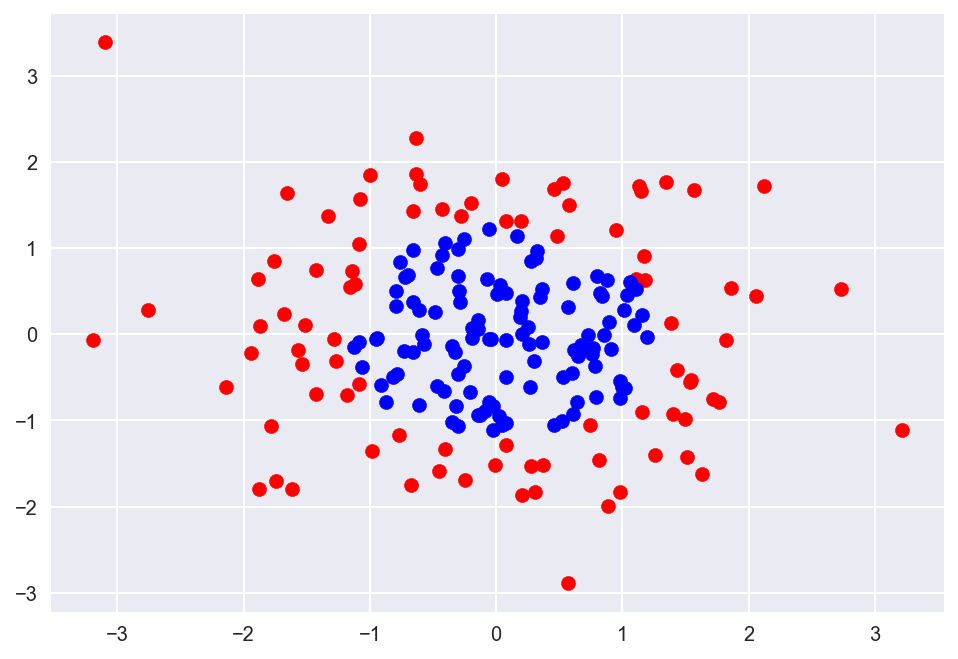

In [2]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

使用逻辑回归
+ 当数据集不是线性可分的时候，可以看到，使用逻辑回归的分类的效果很差。

In [3]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [4]:
log_reg.score(X, y)

0.605

这个时候，我们画出决策边界来看一下，

In [5]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


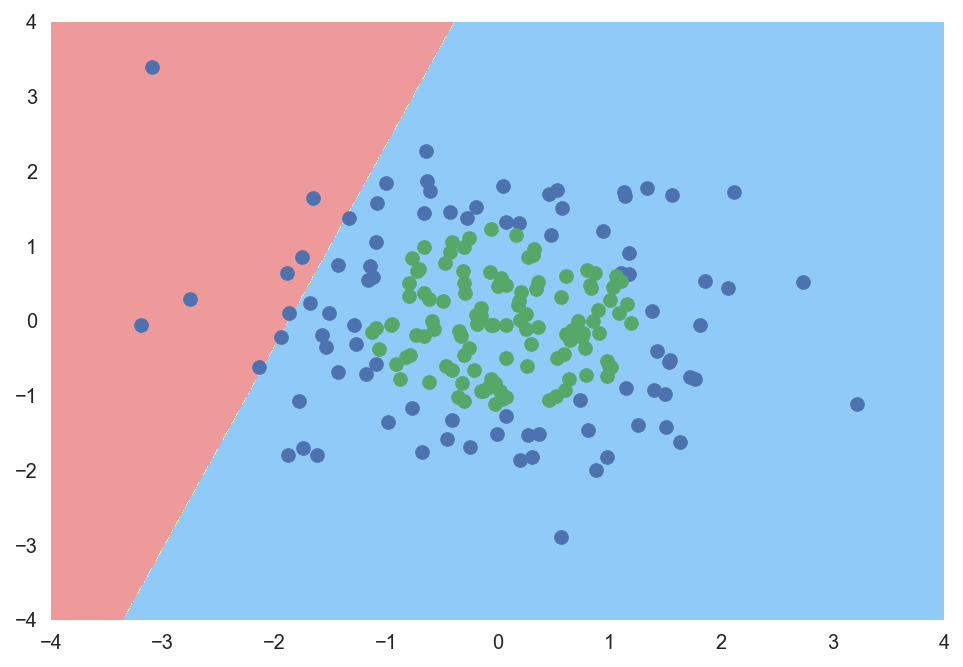

In [6]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### 于是，我们引入多项式回归，我们让逻辑回归中的线性部分，变成多项式特征

+ 为此，我们直接使用 scikit-learn 中为我们提供的 PolynomialFeatures、LogisticRegression
+ 千万不要忘了，引入了多项式特征以后，为了让梯度下降法有更好的收敛速度，我们一定要做特征标准化

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 在使用多项式的方式构造特征的时候，一定要记得数据归一化
# polynomials 多项式


def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])


# 多项式逻辑回归
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

我们喂给全部的数据，得到的准确度是：

In [8]:
poly_log_reg.score(X, y)

0.95

## 特征为 2 时的决策边界

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


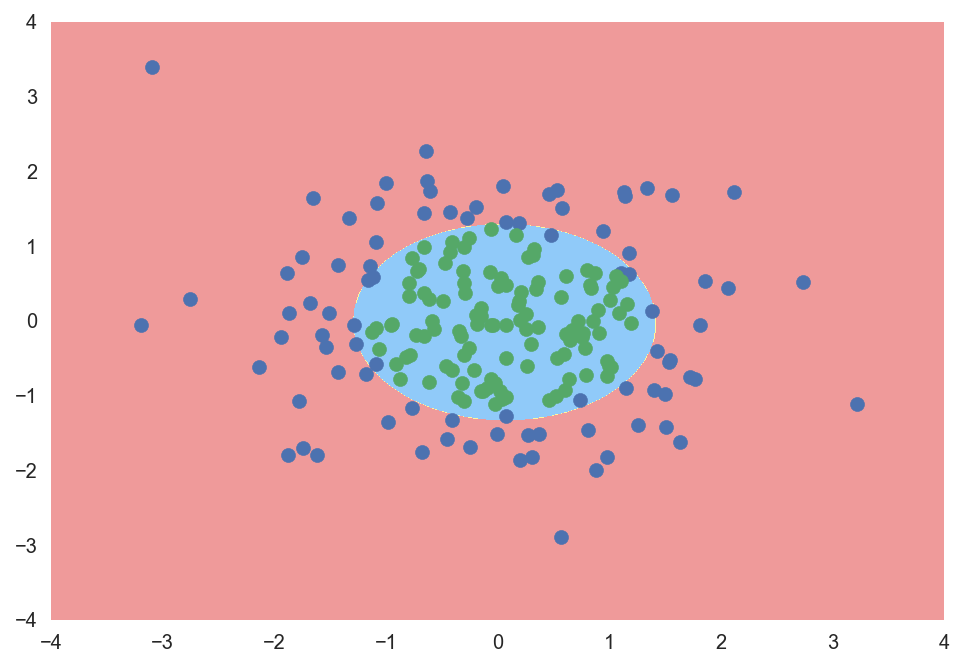

In [9]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

使用复杂的多项式回归，看看决策边界。

## 特征为 20 时的决策边界

In [10]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

可以看到决策边界不是很规整。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


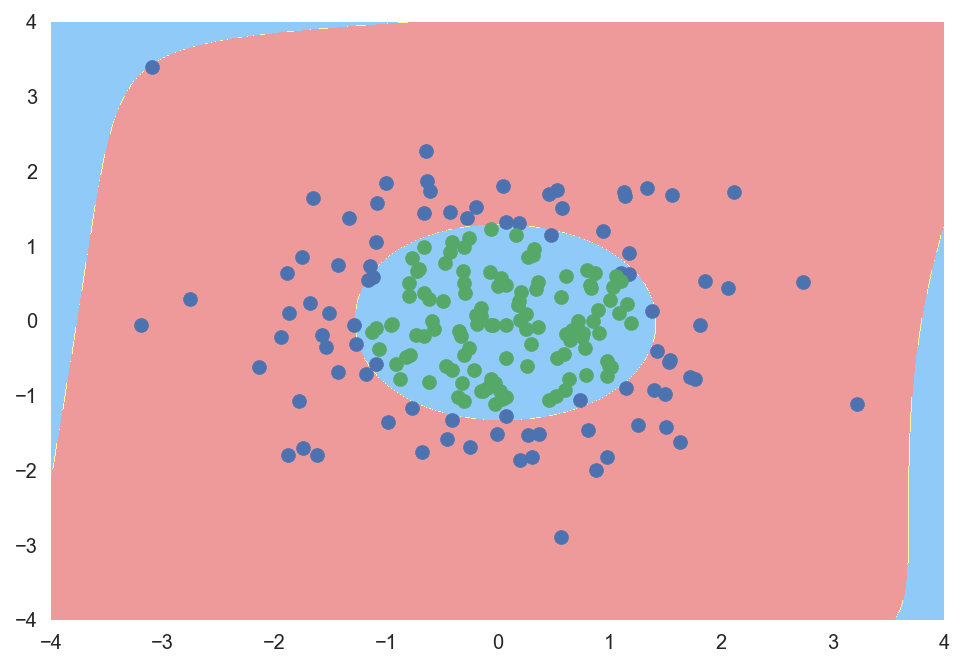

In [11]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()